In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [48]:
import datetime
import numpy as np
import pandas as pd
import spectral.io.envi as envi
import matplotlib.pyplot as plt
import glob
import re

Get wavelength data

In [84]:
diri = "/disks/arctic5_scratch/abarrett/seaice_albedo/Spectra/SHEBA/original"
fili = "wavelength.dat"
f = open(diri+"/"+fili,"r")
wavelength = np.genfromtxt(f, delimiter=",")
f.close()

wavelength

array([  368.4,   371. ,   373.6,   376.2,   378.8,   381.4,   384. ,
         386.6,   389.2,   391.7,   394.3,   396.9,   399.5,   402.1,
         404.7,   407.3,   409.9,   412.5,   415.1,   417.7,   420.3,
         422.8,   425.4,   428. ,   430.6,   433.2,   435.8,   438.6,
         441.4,   444.2,   447. ,   449.8,   452.6,   455.3,   458.1,
         460.9,   463.7,   466.5,   469.3,   472.1,   474.9,   477.7,
         480.5,   483.3,   486.1,   488.9,   491.6,   494.4,   497.2,
         500. ,   502.8,   505.6,   508.4,   511.2,   514. ,   516.8,
         519.6,   522.4,   525.2,   527.9,   530.7,   533.5,   536.3,
         539.1,   541.9,   544.7,   547.5,   550.4,   553.3,   556.1,
         559. ,   561.9,   564.8,   567.6,   570.5,   573.4,   576.2,
         579.1,   582. ,   585. ,   587.9,   590.9,   593.8,   596.7,
         599.7,   602.6,   605.5,   608.5,   611.4,   614.4,   617.3,
         620.2,   623.2,   626.1,   629. ,   632. ,   634.9,   637.9,
         640.8,   64

Define Sheba Wavelength

In [85]:
def get_ShebaSpectral_BandInfo():
    
    import spectral
    
    p = spectral.BandInfo()
    p.centers = np.array([  368.4,   371. ,   373.6,   376.2,   378.8,   381.4,   384. ,
         386.6,   389.2,   391.7,   394.3,   396.9,   399.5,   402.1,
         404.7,   407.3,   409.9,   412.5,   415.1,   417.7,   420.3,
         422.8,   425.4,   428. ,   430.6,   433.2,   435.8,   438.6,
         441.4,   444.2,   447. ,   449.8,   452.6,   455.3,   458.1,
         460.9,   463.7,   466.5,   469.3,   472.1,   474.9,   477.7,
         480.5,   483.3,   486.1,   488.9,   491.6,   494.4,   497.2,
         500. ,   502.8,   505.6,   508.4,   511.2,   514. ,   516.8,
         519.6,   522.4,   525.2,   527.9,   530.7,   533.5,   536.3,
         539.1,   541.9,   544.7,   547.5,   550.4,   553.3,   556.1,
         559. ,   561.9,   564.8,   567.6,   570.5,   573.4,   576.2,
         579.1,   582. ,   585. ,   587.9,   590.9,   593.8,   596.7,
         599.7,   602.6,   605.5,   608.5,   611.4,   614.4,   617.3,
         620.2,   623.2,   626.1,   629. ,   632. ,   634.9,   637.9,
         640.8,   643.7,   646.7,   649.6,   652.5,   655.5,   658.4,
         661.4,   664.3,   667.2,   670.2,   673.1,   676. ,   679. ,
         681.9,   684.9,   687.8,   690.7,   693.7,   696.6,   699.6,
         702.5,   705.5,   708.5,   711.5,   714.4,   717.4,   720.4,
         723.4,   726.3,   729.3,   732.3,   735.3,   738.2,   741.2,
         744.2,   747.1,   750.1,   753.1,   756.1,   759. ,   762. ,
         765. ,   768. ,   771.1,   774.1,   777.1,   780.1,   783.2,
         786.2,   789.2,   792.2,   795.3,   798.3,   801.3,   804.3,
         807.4,   810.4,   813.6,   816.8,   820.1,   823.3,   826.5,
         829.7,   832.9,   836.1,   839.3,   842.5,   845.7,   848.8,
         852. ,   855.2,   858.4,   861.5,   864.7,   867.9,   871.1,
         874.2,   877.4,   880.6,   883.7,   886.9,   890.1,   893.3,
         896.4,   899.6,   902.8,   906. ,   909.1,   912.3,   915.4,
         918.6,   921.7,   924.9,   928. ,   931.2,   934.3,   937.5,
         940.6,   943.8,   946.9,   950.1,   953.2,   956.4,   959.5,
         962.7,   965.8,   968.9,   972.1,   975.2,   978.4,   981.5,
         984.7,   987.8,   991. ,   994.1,   997.3,  1000.4,  1003.6,
        1006.7,  1009.9,  1013. ,  1016.2,  1019.3,  1022.4,  1025.6,
        1028.7,  1031.9,  1035. ,  1038.2,  1041.3,  1044.5,  1047.6,
        1050.8,  1053.9,  1057.1,  1060.2,  1063.4,  1066.5,  1069.7,
        1072.8,  1075.9,  1079.1,  1082.2,  1085.4,  1088.5,  1091.7,
        1094.8,  1098. ,  1101.1,  1104.3,  1107.4,  1110.6,  1113.7])
    p.band_quantity = "wavelengths"
    p.band_units = "Nanometers"
    
    return p

In [87]:
sheba_wavelength = get_ShebaSpectral_BandInfo()

[  368.4   371.    373.6   376.2   378.8   381.4   384.    386.6   389.2
   391.7   394.3   396.9   399.5   402.1   404.7   407.3   409.9   412.5
   415.1   417.7   420.3   422.8   425.4   428.    430.6   433.2   435.8
   438.6   441.4   444.2   447.    449.8   452.6   455.3   458.1   460.9
   463.7   466.5   469.3   472.1   474.9   477.7   480.5   483.3   486.1
   488.9   491.6   494.4   497.2   500.    502.8   505.6   508.4   511.2
   514.    516.8   519.6   522.4   525.2   527.9   530.7   533.5   536.3
   539.1   541.9   544.7   547.5   550.4   553.3   556.1   559.    561.9
   564.8   567.6   570.5   573.4   576.2   579.1   582.    585.    587.9
   590.9   593.8   596.7   599.7   602.6   605.5   608.5   611.4   614.4
   617.3   620.2   623.2   626.1   629.    632.    634.9   637.9   640.8
   643.7   646.7   649.6   652.5   655.5   658.4   661.4   664.3   667.2
   670.2   673.1   676.    679.    681.9   684.9   687.8   690.7   693.7
   696.6   699.6   702.5   705.5   708.5   711.5   

Read spectra

Parse filename to get date

In [118]:
-

In [179]:
# Get list of miscellaneous spectra files
fileList = glob.glob(diri+"/"+"ShebaSpectral_*_misc.txt")

# Read files one at a time
#for fili in fileList:
    
spectra, metadata = read_shebaspectral(fileList[28])

metadata

{'filedate': datetime.datetime(1998, 9, 3, 0, 0),
 'nband': 252,
 'ntarget': 2,
 'source_file': '/disks/arctic5_scratch/abarrett/seaice_albedo/Spectra/SHEBA/original/ShebaSpectral_September3_misc.txt',
 'target': ['lead w black ice', 'lead w/ more brash']}

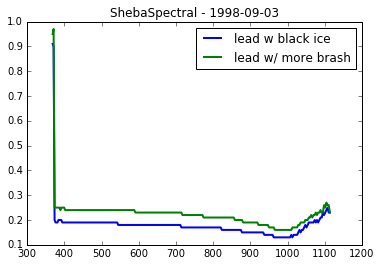

In [180]:
fig, ax = plt.subplots()
if metadata['ntarget'] > 1:
    for ip in np.arange(0,metadata['ntarget']):
        ax.plot(wavelength,spectra[:,ip],label=metadata['target'][ip],lw=2)
else:
    ax.plot(wavelength,spectra,label=metadata['target'],lw=2)
    
legend = plt.legend(loc='upper right')
title = plt.title('ShebaSpectral - '+metadata['filedate'].strftime('%Y-%m-%d'))

In [181]:
spectra[:,1]

array([ 0.95,  0.97,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.24,
        0.25,  0.25,  0.25,  0.25,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,
        0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,
        0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,
        0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,
        0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.23,  0.22,  0.22,
        0.22,  0.22,